In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zomato_df = pd.read_csv("zomato_dataset.csv")

In [4]:
zomato_df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [5]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [6]:
zomato_df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [10]:
zomato_df.loc(axis=1)['Dining Rating'] = zomato_df.loc(axis=1)['Dining Rating'].fillna(zomato_df.loc(axis=1)['Dining Rating'].mean())

In [13]:
zomato_df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [12]:
zomato_df.loc(axis=1)['Delivery Rating'] = zomato_df.loc(axis=1)['Delivery Rating'].fillna(zomato_df.loc(axis=1)['Delivery Rating'].mean())

In [28]:
zomato_df.loc(axis=1)['Best Seller'].mode()[0]

'BESTSELLER'

In [30]:
zomato_df.loc(axis=1)['Best Seller'] = zomato_df.loc(axis=1)['Best Seller'].fillna(zomato_df.loc(axis=1)['Best Seller'].mode()[0])

In [31]:
zomato_df.isnull().sum()

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best Seller        0
Votes              0
Prices             0
dtype: int64

In [32]:
zomato_df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,BESTSELLER,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


### Average Dining and Delivery Rating

In [37]:
zomato_df.loc(axis=1)['Dining Rating'].mean()

3.8222640312400875

In [38]:
avg_dining_rating = (zomato_df.loc(axis=1)['Dining Rating'].sum())/len(zomato_df.loc(axis=1)['Dining Rating'])

avg_dining_rating 

3.8222640312400875

In [39]:
zomato_df.loc(axis=1)['Delivery Rating'].mean()

3.9631842584799437

In [40]:
avg_delivery_rating = (zomato_df.loc(axis=1)['Delivery Rating'].sum())/len(zomato_df.loc(axis=1)['Delivery Rating'])

avg_delivery_rating

3.9631842584799437

### TOP 10 Restaurant according to Dining Rating

In [43]:
top_restaurants_dining_rating = zomato_df.groupby(['Restaurant Name'])['Dining Rating'].mean().sort_values(ascending=False).head(10)

top_restaurants_dining_rating

Restaurant Name
Thali and More               4.7
Toscano                      4.7
AB's - Absolute Barbecues    4.7
Eating Circles               4.6
Brik Oven                    4.6
Cafe 17                      4.6
Truffles                     4.6
Urban Khichdi                4.6
Exotica                      4.6
Dastarkhwan                  4.5
Name: Dining Rating, dtype: float64

Text(0, 0.5, '')

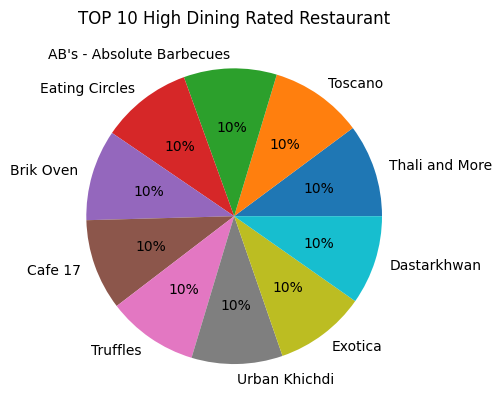

In [57]:
top_restaurants_dining_rating.plot.pie(autopct="%.0f%%",title='TOP 10 High Dining Rated Restaurant').set_ylabel('')

### TOP 10 Restaurant according to Delivery Rating

In [53]:
top_restaurants_delivery_rating = zomato_df.groupby(['Restaurant Name'])['Delivery Rating'].mean().sort_values(ascending=False).head(10)

top_restaurants_delivery_rating

Restaurant Name
Subhan Bakery                                  4.600000
Dream Cutlets                                  4.600000
Tibb's Frankie - Serving Rolls Since 1969      4.500000
LeanCrust Pizza - ThinCrust Experts            4.500000
Balaram Mullick & Radharaman Mullick Sweets    4.500000
Natural Ice Cream                              4.500000
Swiss Castle                                   4.500000
Vadilal - Scoop Shop                           4.500000
Mitra Cafe                                     4.500000
Baskin Robbins - Ice Cream Desserts            4.447429
Name: Delivery Rating, dtype: float64

Text(0, 0.5, '')

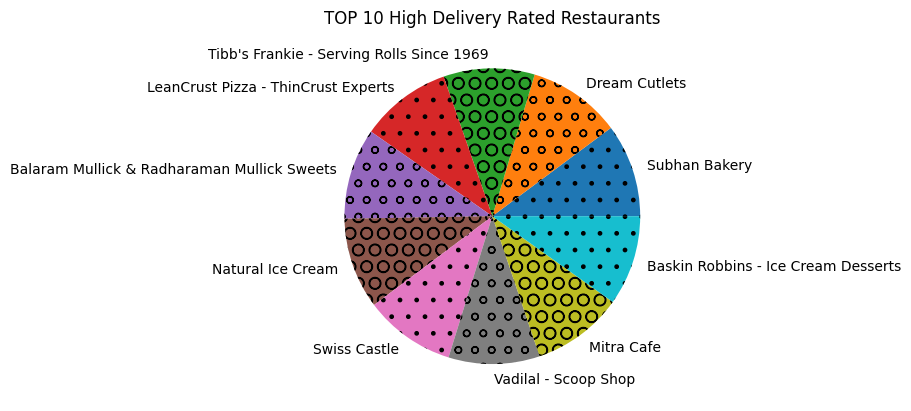

In [56]:
top_restaurants_delivery_rating.plot.pie(title="TOP 10 High Delivery Rated Restaurants",hatch=['.','o','O']).set_ylabel('')

### Highest Number of restaurants all over INDIA

In [64]:
zomato_df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,BESTSELLER,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [67]:
highest_number_restaurants = zomato_df.loc(axis=1)['Restaurant Name'].value_counts().sort_values(ascending=False).head(10)

highest_number_restaurants

Restaurant Name
McDonald's         2059
Domino's Pizza     1435
Burger King        1352
FreshMenu          1097
Pizza Hut          1077
Kanha               934
La Pino'z Pizza     868
Subway              823
KFC                 751
The Momoz Hub       700
Name: count, dtype: int64

Text(0, 0.5, 'Number of Restaurants')

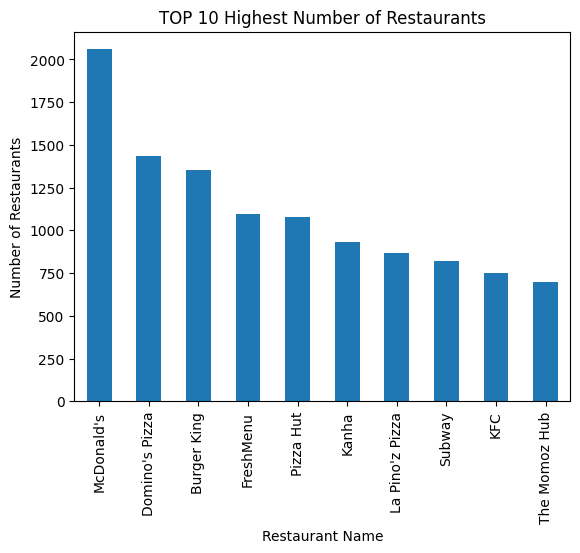

In [69]:
highest_number_restaurants.plot.bar(title='TOP 10 Highest Number of Restaurants').set_ylabel('Number of Restaurants')

In [70]:
zomato_df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,BESTSELLER,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


### TOP 10 City which have highest number of Restaurants

In [73]:
top_city = zomato_df.loc(axis=1)['City'].value_counts().sort_values(ascending=False).head(10)

top_city

City
 Hyderabad    15613
 Jaipur       14438
 Mumbai       13535
 Chennai      13100
 Bangalore    12040
 Ahmedabad    10178
 Kolkata       8662
 Pune          8067
 Kochi         7759
 Raipur        7700
Name: count, dtype: int64

<Axes: title={'center': 'TOP Cities with highest number of Restaurants'}, xlabel='City'>

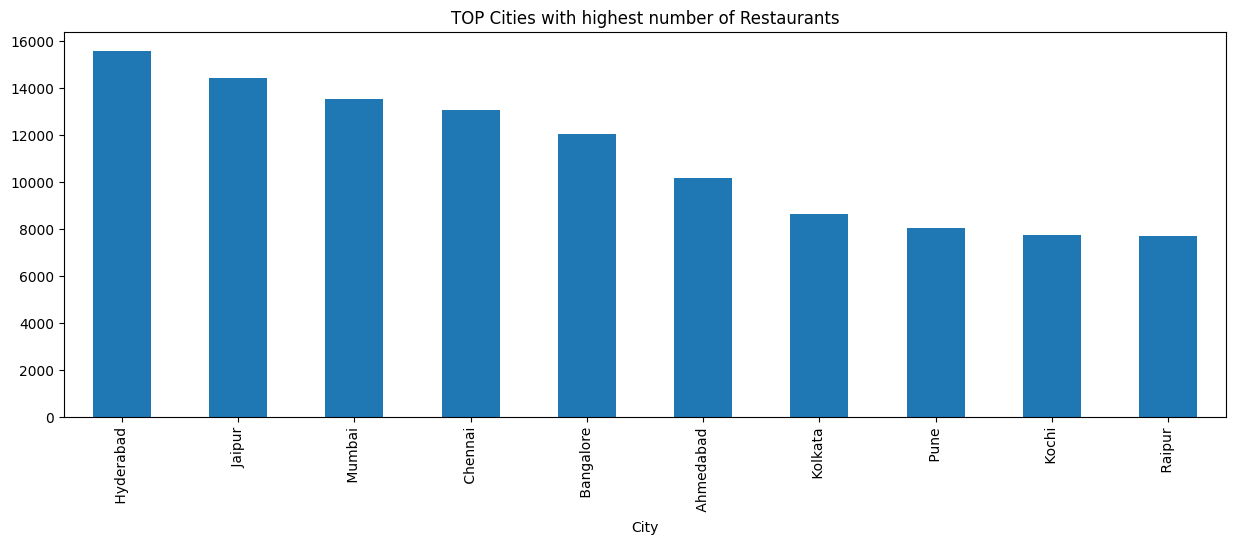

In [75]:
top_city.plot.bar(title= 'TOP Cities with highest number of Restaurants',figsize=(15,5))

### TOP 10 City for you Favorite Food

<Axes: title={'center': 'Top Restaurant for your food'}, xlabel='City'>

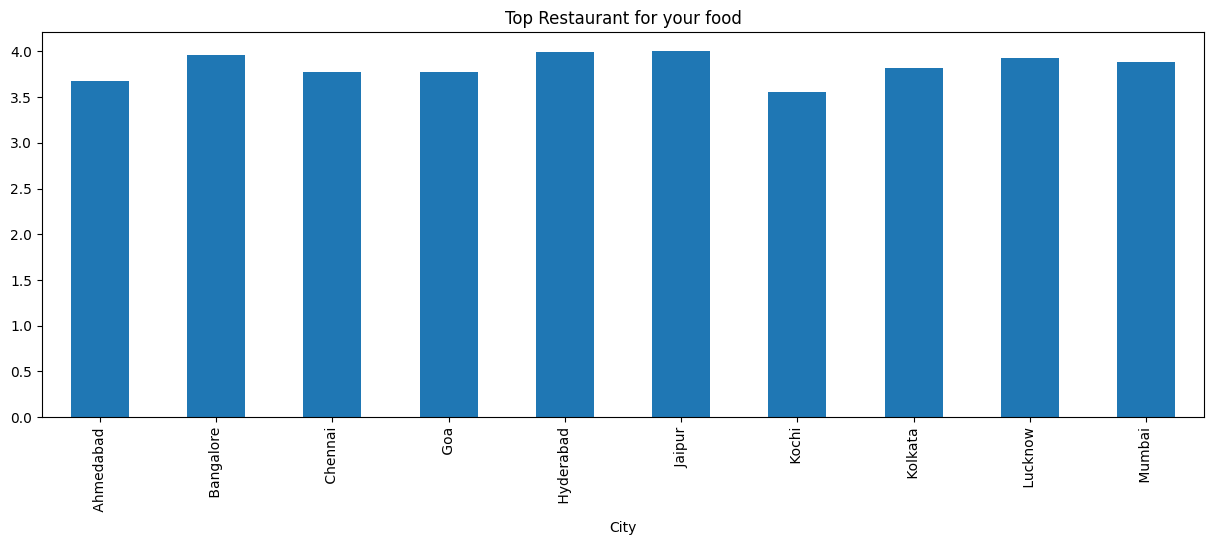

In [91]:
item = input('Enter Your Favorite Food')

food_item = zomato_df[zomato_df.loc(axis=1)['Item Name']==item]

top_item_restaurant = food_item.groupby('City')['Dining Rating'].mean().head(10)

top_item_restaurant.plot.bar(figsize=(15,5),title="Top Restaurant for your food")

### Dining Rating VS Price for Restaurant

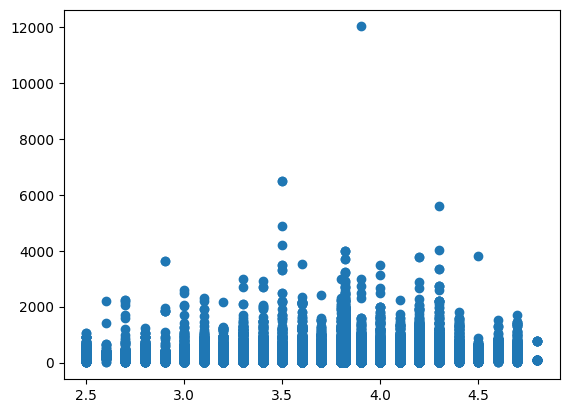

In [100]:
plt.scatter(x = zomato_df.loc(axis=1)['Dining Rating'],y = zomato_df.loc(axis=1)['Prices'])
